# Visualize particle tracks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pickle
from mpl_toolkits.basemap import Basemap

%matplotlib inline

INFO: Compiled ParcelsRandom ==> /tmp/parcels-2672/libparcels_random_93e5dc4d-66ca-477d-acda-16b873f89383.so


#### Parameters

In [2]:
# colors:
land_color = '#a9a7a2'

# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179
isize = imax - imin
jsize = jmax - jmin

# run result file location:
base_folder = '/ocean/brogalla/GEOTRACES/parcels/Pb-chapter/'

#### Load files

In [ ]:
mesh         = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon     = mesh['nav_lon'].values
mesh_lat     = mesh['nav_lat'].values
mesh_bathy   = mesh['tmask'][0,:,:,:].values
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
ocean_masked = np.ma.masked_where((mesh_bathy<0.1), mesh_bathy)
depths       = mesh['nav_lev'].values

#### Functions

In [1]:
def load_tracks(filename, tracer='dissolpb'):
    file  = xr.open_dataset(filename)
    traj  = file['trajectory'].values # dimensions: number of particles, tracks
    time  = file['time'].values       # units: seconds
    lat   = file['lat'].values        # degrees North
    lon   = file['lon'].values        # degrees East
    depth = file['z'].values          # meters
    
    if tracer == '': # if the run is not coupled to a tracer
        return traj, time, lon, lat, depth
    else:
        trace = file[tracer].values       # tracer concentration
        return traj, time, lon, lat, depth, trace

In [ ]:
def plot_map_tracks(lont, latt, trajt, tracer=np.nan):
    # optional argument: tracer --- to plot track with color as tracer concentration, pass the tracer concentration track from load_tracks

    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

    x, y = proj1(lont, latt)

    for particle in range(0,trajt.shape[0]):
        x_plot = x[particle,:][x[particle,:] < 1e10]
        y_plot = y[particle,:][y[particle,:] < 1e10]

        if ~np.isnan(tracer):
            ax1.scatter(x_plot, y_plot, s=1, c=tracer[particle,:][y[particle,:] < 1e10], zorder=4)
        else:
            ax1.scatter(x_plot, y_plot, s=1, zorder=4)

    # fig.colorbar(c, shrink=0.5, label='Time [hours]')
    return

In [ ]:
def hovmoeller(timet, lont, latt, trajt, tracert):
    
    # Hoevmueller diagram: 
    fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)

    cf = ax.contourf(timet, latt[:,0], tracert) 
        
    ax.set_xlabel('Date',fontsize=6)
    ax.set_ylabel('Release latitude [degrees north]', fontsize=6)
    ax.tick_params(axis='both', which='major', labelsize=6)
#     ax.set_ylim(0,20)
    cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True, label='Tracer concentration')
    
    return

#### Main section

In [11]:
# Load results: 
traj_t1, time_t1, lon_t1, lat_t1, depth_t1, dPb_t1 = load_tracks(f'{base_folder}2015-parcel-tracks.nc', tracer='dissolpb')

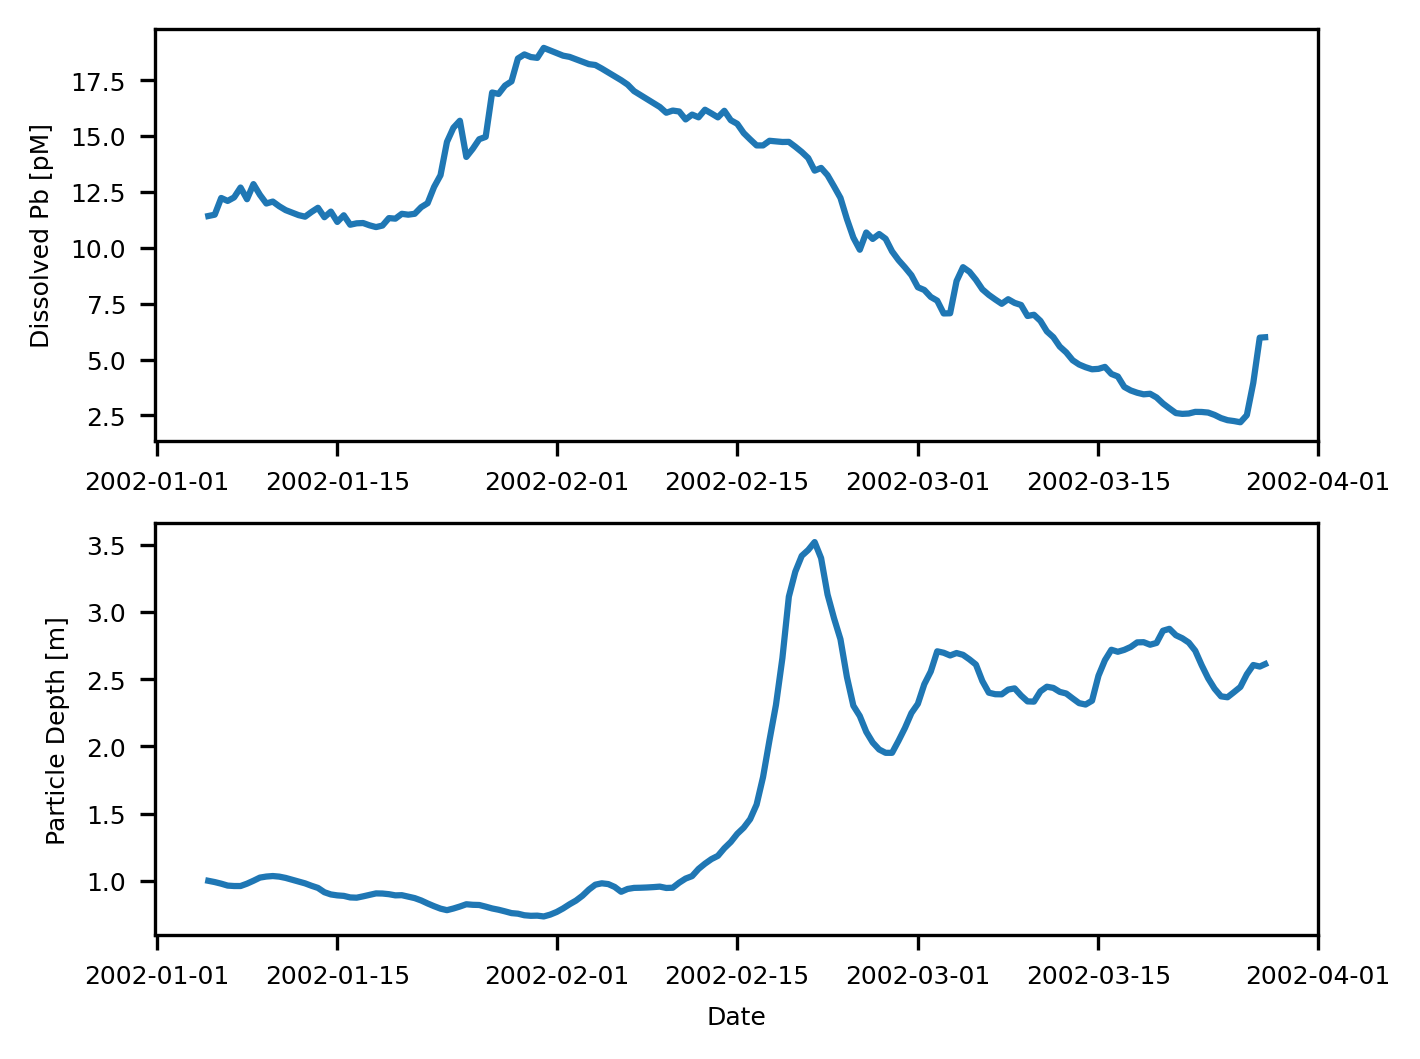

In [12]:
particle=3

fig, ax = plt.subplots(2,1, figsize=(5,4), dpi=300)

ax[0].plot(time_t1[particle,:], dPb_t1[particle,:]*1e12)
ax[0].set_ylabel('Dissolved Pb [pM]', fontsize=6)

ax[1].plot(time_t1[particle,:], depth_t1[particle,:])
ax[1].set_ylabel('Particle Depth [m]', fontsize=6)
ax[1].set_xlabel('Date',fontsize=6)

for axis in ax.ravel():
    axis.tick_params(axis='both', which='major', labelsize=6)

(0.0, 20.0)

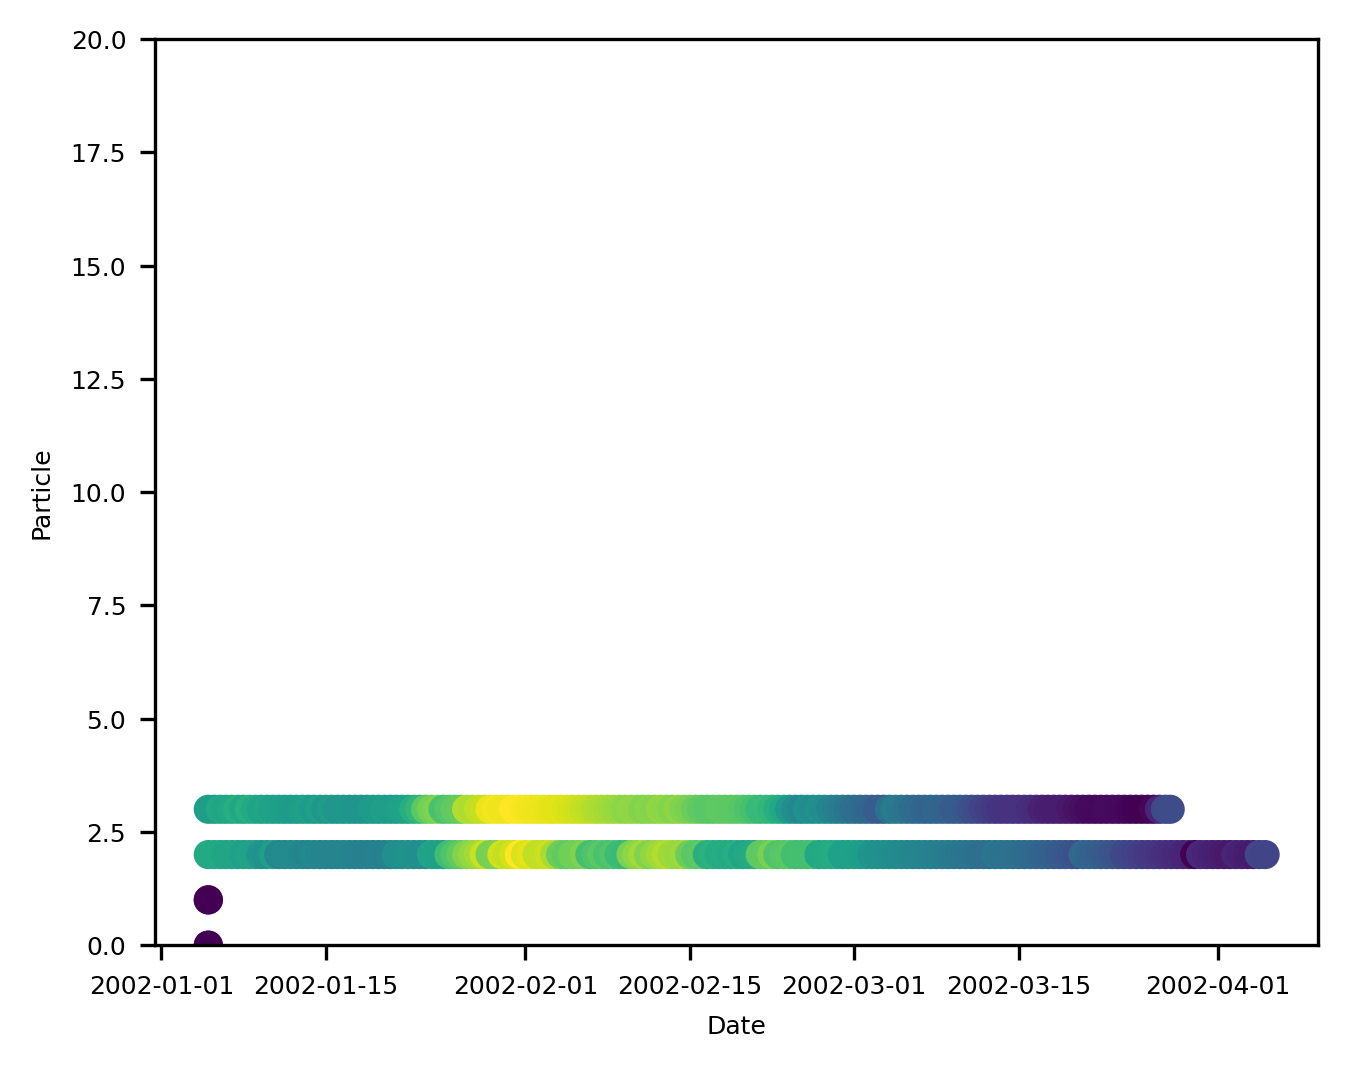

In [13]:
hovmoeller(time_t1, lon_t1, lat_t1, traj_t1, dPb_t1)

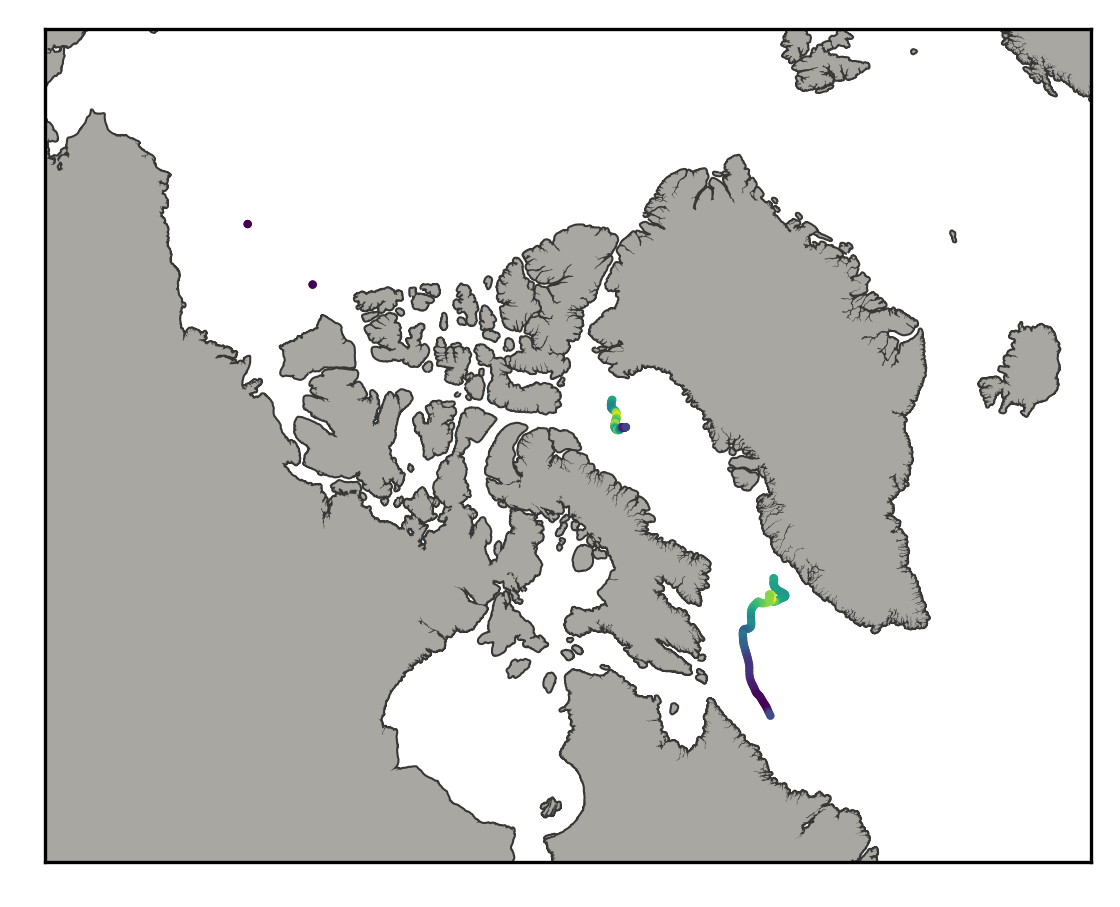

In [14]:
plot_map_tracks(lon_t1, lat_t1, traj_t1, tracer=dPb_t1)